In [78]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
# Load the Dataset
df_rating_books_raw = pd.read_csv('../data/processed/filtered_data_processed.csv')

df_rating_books_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339620 entries, 0 to 339619
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      339620 non-null  int64  
 1   index           339620 non-null  int64  
 2   title           339620 non-null  object 
 3   user_id         253152 non-null  object 
 4   helpfulness     339620 non-null  float64
 5   review          339620 non-null  float64
 6   text            339620 non-null  object 
 7   review_year     339620 non-null  int64  
 8   authors         334206 non-null  object 
 9   publisher       282177 non-null  object 
 10  categories      309345 non-null  object 
 11  published_year  339620 non-null  int64  
 12  num_reviews     339620 non-null  int64  
 13  num_row         339620 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 36.3+ MB


In [80]:
df_rating_books_raw = df_rating_books_raw.drop(['Unnamed: 0'], axis=1)

In [81]:
df_vader_sentiment_raw = pd.read_csv('../data/processed/df_reduced_with_sentiment.csv')

df_vader_sentiment_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339620 entries, 0 to 339619
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  339620 non-null  int64 
 1   num_row     339620 non-null  int64 
 2   text_clean  339617 non-null  object
 3   sentiment   339620 non-null  object
dtypes: int64(2), object(2)
memory usage: 10.4+ MB


In [82]:
df_vader_sentiment = df_vader_sentiment_raw.drop(['Unnamed: 0'], axis=1)
df_vader_sentiment.sample()

,num_row,text_clean,sentiment
225781,225781,finished book modern library classic must say best book ive ever read life thrilling tale adventure revenge romance spirituality morality dumas ta...,POS


In [83]:
df_all_data = df_rating_books_raw.merge(df_vader_sentiment, on='num_row', how='inner')
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339620 entries, 0 to 339619
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           339620 non-null  int64  
 1   title           339620 non-null  object 
 2   user_id         253152 non-null  object 
 3   helpfulness     339620 non-null  float64
 4   review          339620 non-null  float64
 5   text            339620 non-null  object 
 6   review_year     339620 non-null  int64  
 7   authors         334206 non-null  object 
 8   publisher       282177 non-null  object 
 9   categories      309345 non-null  object 
 10  published_year  339620 non-null  int64  
 11  num_reviews     339620 non-null  int64  
 12  num_row         339620 non-null  int64  
 13  text_clean      339617 non-null  object 
 14  sentiment       339620 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 38.9+ MB


In [84]:
#Original Text is removed as clean text is added
df_all_data = df_all_data.drop(['text'], axis=1)
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339620 entries, 0 to 339619
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           339620 non-null  int64  
 1   title           339620 non-null  object 
 2   user_id         253152 non-null  object 
 3   helpfulness     339620 non-null  float64
 4   review          339620 non-null  float64
 5   review_year     339620 non-null  int64  
 6   authors         334206 non-null  object 
 7   publisher       282177 non-null  object 
 8   categories      309345 non-null  object 
 9   published_year  339620 non-null  int64  
 10  num_reviews     339620 non-null  int64  
 11  num_row         339620 non-null  int64  
 12  text_clean      339617 non-null  object 
 13  sentiment       339620 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 36.3+ MB


In [85]:
df_all_data = df_all_data.drop(['index'], axis=1)
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339620 entries, 0 to 339619
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           339620 non-null  object 
 1   user_id         253152 non-null  object 
 2   helpfulness     339620 non-null  float64
 3   review          339620 non-null  float64
 4   review_year     339620 non-null  int64  
 5   authors         334206 non-null  object 
 6   publisher       282177 non-null  object 
 7   categories      309345 non-null  object 
 8   published_year  339620 non-null  int64  
 9   num_reviews     339620 non-null  int64  
 10  num_row         339620 non-null  int64  
 11  text_clean      339617 non-null  object 
 12  sentiment       339620 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 33.7+ MB


In [86]:
df_all_data = df_all_data.drop(['num_row'], axis=1)
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339620 entries, 0 to 339619
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           339620 non-null  object 
 1   user_id         253152 non-null  object 
 2   helpfulness     339620 non-null  float64
 3   review          339620 non-null  float64
 4   review_year     339620 non-null  int64  
 5   authors         334206 non-null  object 
 6   publisher       282177 non-null  object 
 7   categories      309345 non-null  object 
 8   published_year  339620 non-null  int64  
 9   num_reviews     339620 non-null  int64  
 10  text_clean      339617 non-null  object 
 11  sentiment       339620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 31.1+ MB


In [87]:
# Convert Sentiment to Category
df_all_data['sentiment'] = pd.Categorical(df_all_data['sentiment'])

In [88]:
def custom_string_to_list(s):
    if isinstance(s, str):
        return [item.strip(" '[]") for item in s.split(',')]
    else:
        return s

In [89]:
df_all_data['authors'] = df_all_data['authors'].apply(custom_string_to_list)
df_all_data['categories'] = df_all_data['categories'].apply(custom_string_to_list)

In [90]:
df_all_data.sample(10, random_state=4)

,title,user_id,helpfulness,review,review_year,authors,publisher,categories,published_year,num_reviews,text_clean,sentiment
76555,Pride and Prejudice,A1FR1V6FUOGOP1,0.571429,2.0,2008,[Jane Austen],Courier Corporation,[Fiction],1995,20371,missed product description said printed horizontal instead usual vertical weird me returned it,NEG
90408,Crime and Punishment,A3CLZ8AXAW8PYR,1.000000,5.0,2000,"[Fyodor Dostoyevsky, Constance Garnett]",Courier Corporation,[Fiction],2001,2704,rodion raskolnikov demarcated humanity terms &quot;ordinary&quot; &quot;extraordinary&quot; humanity also generalized terms empthasized rodion fee...,POS
42585,The Giver,NaN,0.000000,5.0,1999,[Lois Lowry],Harcourt Brace,[Juvenile Fiction],2014,7644,thought book great class read project loved it i including rest students read ahead schedule wait extra day see happened although spots book seems...,POS
218128,I know this much is true,NaN,0.000000,4.0,1999,[Wally Lamb],Harper,[Fiction],1998,1630,wally lamb truly gifted writer obvious mr lamb great deal research putting work together hard work certainly paid piece intriguing entertaining ch...,POS
242982,Lord of the flies: A novel,A2C7BOQVFH1HLE,0.000000,5.0,2009,[William Golding],Penguin,[Fiction],2003,1555,lord flies smells really sweet fan anything able translate complex issues simple ways found goldings work incredibly great really interesting grea...,POS
280108,The Catcher in the Rye [Audiobook] [Cd] [Unabridged] (Audio CD),A2O9HU1K7TCF7B,1.000000,5.0,2001,[John Donovan],"North Star Editions, Inc.",[Young Adult Fiction],2010,3270,finished reading book second time first time read book years ago senior high school find even successful adult still identify holden caulfieldthe...,POS
250997,Harper Lee's To Kill a Mockingbird (Barron's Book Notes),A3KR3IJX10LMRI,1.000000,5.0,2006,"[Joyce Milton, Harper Lee]",Turtleback Books,[Juvenile Nonfiction],1984,2396,excellent read strong characters teasing story left wanting read one sitting thanksgiving break book easy fold back print harsh stigmatism feel bo...,POS
24852,"The Hobbitt, or there and back again; illustrated by the author.",AUKUWQAJLVKXC,1.000000,5.0,2012,[J. R. R. Tolkien],Houghton Mifflin Harcourt,[Fiction],2013,4420,ive seen lord rings im really looking forward seeing beginning east read btw,NEUTRAL
234201,Jurassic Park,A8UAC1RDOKT9T,0.000000,4.0,2012,[Michael Crichton],Ballantine Books,[Fiction],2012,1602,michael chricton one preferred authors give works star rating however particular book meet usual high standards seems pumped long weekend instea...,POS
86422,Outsiders,A1MV15IMC2W2ZI,0.153846,1.0,2011,[S. E. Hinton],Pearson UK,[Bullying],2019,1795,careful reading book shows heavy editorial handwhy would anyone today gangs drugs violence antisocial behavior prevelent suggest reading sentiment...,NEG


# Analysis and EDA for target feature

In [91]:
df_all_data['review'].value_counts()

review
5.0    212805
4.0     59142
3.0     25693
1.0     25221
2.0     16759
Name: count, dtype: int64

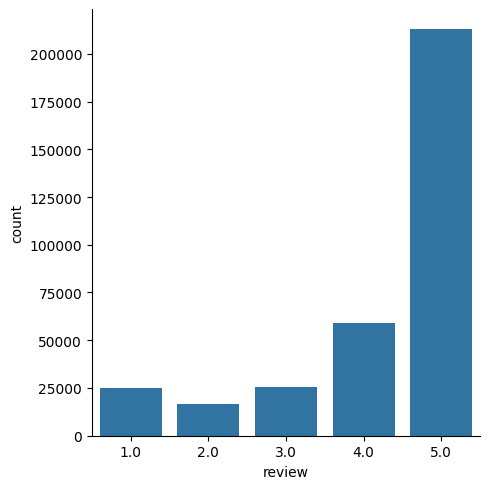

In [92]:
sns.catplot(data=df_all_data, x='review', kind='count', )
plt.show()

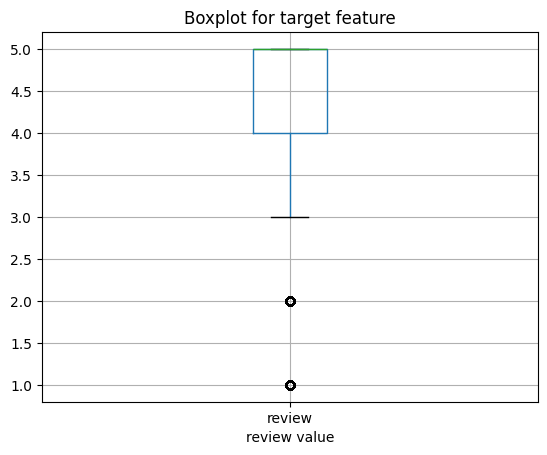

In [93]:
#Create a box plot to check for outliers, median and quartiles
df_all_data.boxplot(column='review')
plt.xlabel("review value")
plt.title("Boxplot for target feature")
plt.show()

In [94]:
df_all_data['review'].describe().T

count    339620.000000
mean          4.229465
std           1.230994
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review, dtype: float64

## Key Findings:
- The Dataset is unbalanced. Having 80.1% of the entries with a High/Postive review [4, 5]. Only 12.3% of the entries have a Low/Negative review [1, 2]. And 7.6% of the entries reviews are neutral [3]
- The Dataset review target feature is biased. Having the 25% Quartile on 4, and 50% and 75% Quartiles on 5. 
- The entries on the dataset with a low review [1, 2] are almost considered as outliers on the boxplot.


# Univariate EDA

## Categories

In [95]:
other_categories_counts

80566

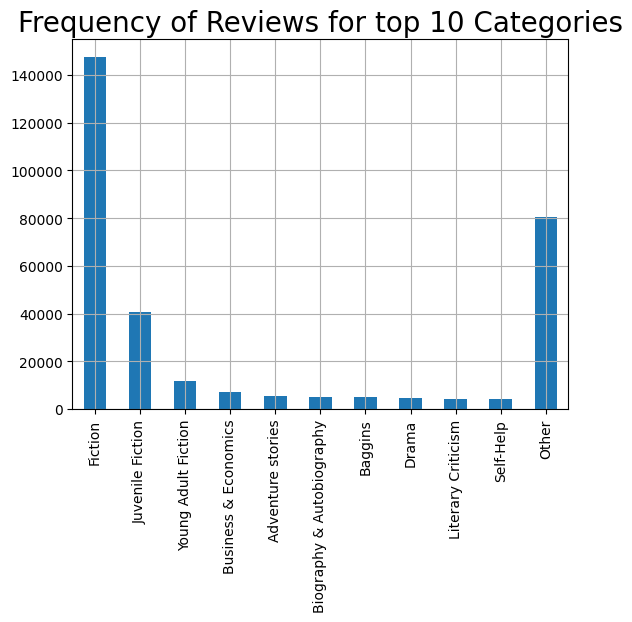

In [96]:
top_10_categories_counts = df_all_data['categories'].explode().value_counts()
top_10_categories_counts = top_10_categories_counts[:10].sort_values(ascending=False)
other_categories_counts = df_all_data['categories'].explode().value_counts()
other_categories_counts = other_categories_counts[10:].sum()
top_categories_with_other = pd.concat([top_10_categories_counts, pd.Series({'Other': other_categories_counts})])
top_categories_with_other.plot(kind='bar')
plt.title('Frequency of Reviews for top 10 Categories', fontsize = 20)
plt.grid()
plt.show()

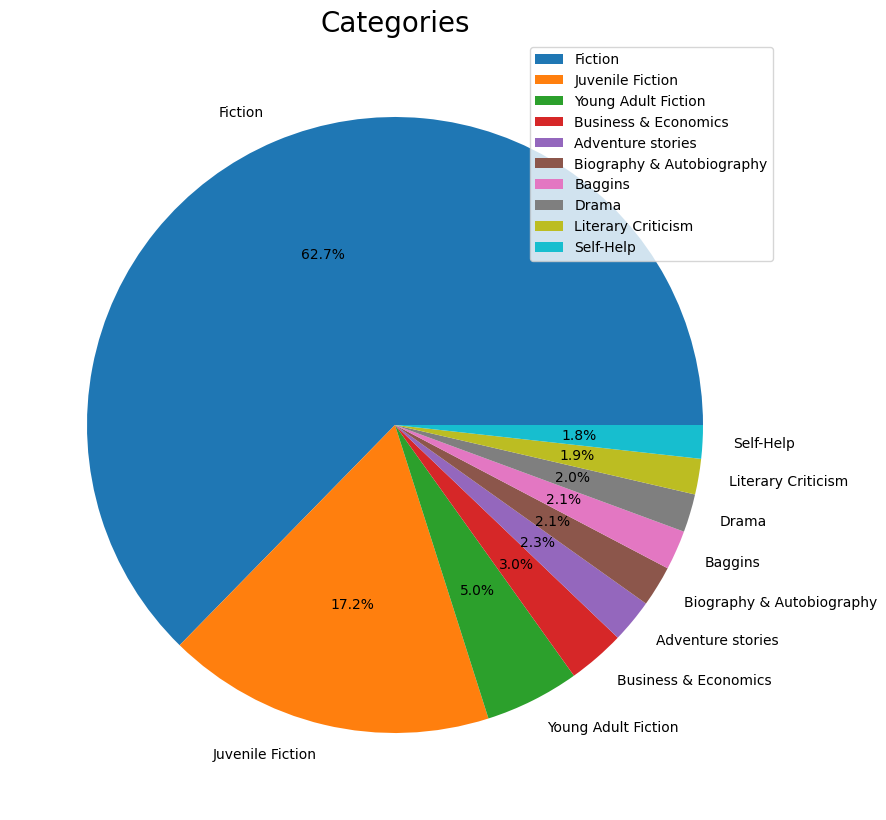

In [97]:
labels=top_10_categories_counts.keys().map(str)

fig = plt.figure(figsize=(10, 10))
plt.pie(top_10_categories_counts, labels=labels,autopct='%1.1f%%')
plt.title('Categories', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

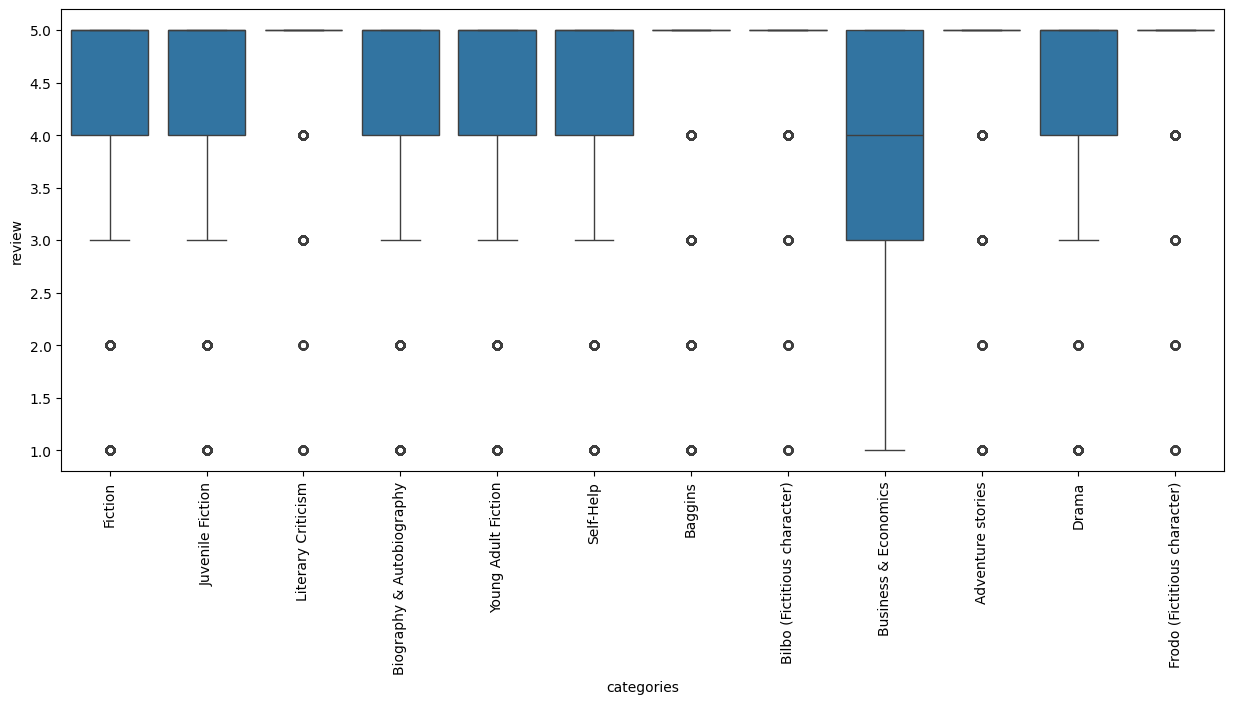

In [98]:
top_categories = top_10_categories_counts.index.to_list()

top_category_filtered_df = df_all_data[df_all_data['categories'].apply(lambda x: isinstance(x, list) and any(category in x for category in top_categories))]

top_category_filtered_df = top_category_filtered_df.explode('categories') 

plt.figure(figsize=(15, 6))  # Set the figure size
sns.boxplot(x='categories', y='review', data=top_category_filtered_df)
plt.xticks(rotation=90)
plt.show()

### Key Findings for Categories:

- Top 10 most reviewed categories are 'Fiction', 'Juvenile Fiction', 'Young Adult Fiction', 'Business & Economics', 'Adventure stories', 'Biography & Autobiography', 'Baggins','Drama', 'Literary Criticism', 'Self-Help'.
- All of the Top 10 most reviewed categories contains reviews values in the 5 Categories [1 ,2 ,3, 4, 5]. All of the Top Categories are biased to high review score. Some of them even have the 25%,50% and 75% quartiles of 5 review score.
- Fiction is most rated category. This category is biased to High review scores, having the mean on 4.5. And the 25% quartile on 4.

## Authors

In [99]:
all_authors = df_all_data['authors'].explode()
author_counts = all_authors.value_counts(ascending=False)
authors_in_desc_order = author_counts.index.tolist()
print(authors_in_desc_order)

['J. R. R. Tolkien', 'Harper Lee', 'John Ronald Reuel Tolkien', 'Charlotte Brontë', 'J. K. Rowling', 'Charles Dickens', 'George Orwell', 'John Steinbeck', 'William Golding', 'Ibi Zoboi', 'Thomas Harris', 'Kurt Vonnegut', 'Robert Jordan', 'F. Scott Fitzgerald', 'Emily Brontë', 'Christopher Paolini', 'Joseph Heller', 'Alexandre Dumas', 'Barbara Kingsolver', 'Jane Austen', 'Lois Lowry', 'Ray Bradbury', 'S. E. Hinton', 'Anita Diamant', 'Louis Sachar', 'J.R.R. Tolkien', 'John Donovan', 'J.D. Salinger', 'Aldous Huxley', 'Stephen King', 'BusinessNews Publishing', 'Margaret Mitchell', 'Lisa S. Brenner', 'Malcolm Gladwell', 'Sharon L. Lechter', 'Arthur Golden', 'Lewis Carroll', 'John Knowles', 'Tim F. LaHaye', 'Jerry B. Jenkins', 'Ayn Rand', 'Joyce Milton', 'Dale Carnegie', 'Richard Adams', '30 Minutes Flip', 'Billionaire Publishing', 'Philip Pullman', 'John Grisham', 'Emily Bronte', 'Mitch Albom', 'Douglas Adams', 'Jon Krakauer', 'Clement Moore', 'Spencer Johnson', 'George R. R. Martin', 'Davi

In [138]:
author_counts

authors
J. R. R. Tolkien             18779
Harper Lee                   11779
John Ronald Reuel Tolkien    11040
Charlotte Brontë              9914
J. K. Rowling                 9794
                             ...  
Nikki Van De Car               259
John Hersey                    249
Dixie Andelin Forsyth          237
Adam Smith                     206
Graham Greene                  170
Name: count, Length: 181, dtype: int64

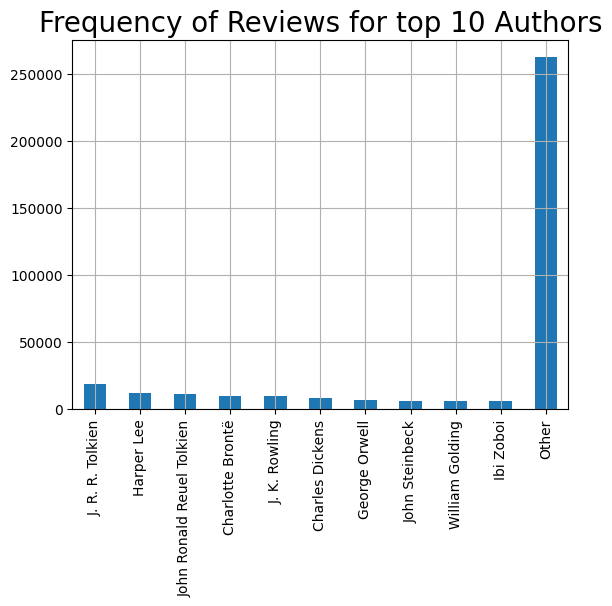

In [144]:
# df_all_data['authors'].replace(to_replace="John Ronald Reuel Tolkien", value="J. R. R. Tolkien")
top_10_authors_counts = df_all_data['authors'].explode().value_counts()
top_10_authors_counts = top_10_authors_counts[:10].sort_values(ascending=False)
other_authors_counts = df_all_data['authors'].explode().value_counts()
other_authors_counts = other_authors_counts[10:].sum()
top_authors_with_other = pd.concat([top_10_authors_counts, pd.Series({'Other': other_authors_counts})])
top_authors_with_other.plot(kind='bar')
plt.title('Frequency of Reviews for top 10 Authors', fontsize = 20)
plt.grid()
plt.show()

#se puede limpiar esa entrada de Tolkien: Unificar los dos nombres en uno solo.

In [141]:
top_10_authors_counts.sum()

95478

In [145]:
other_authors_counts

262427

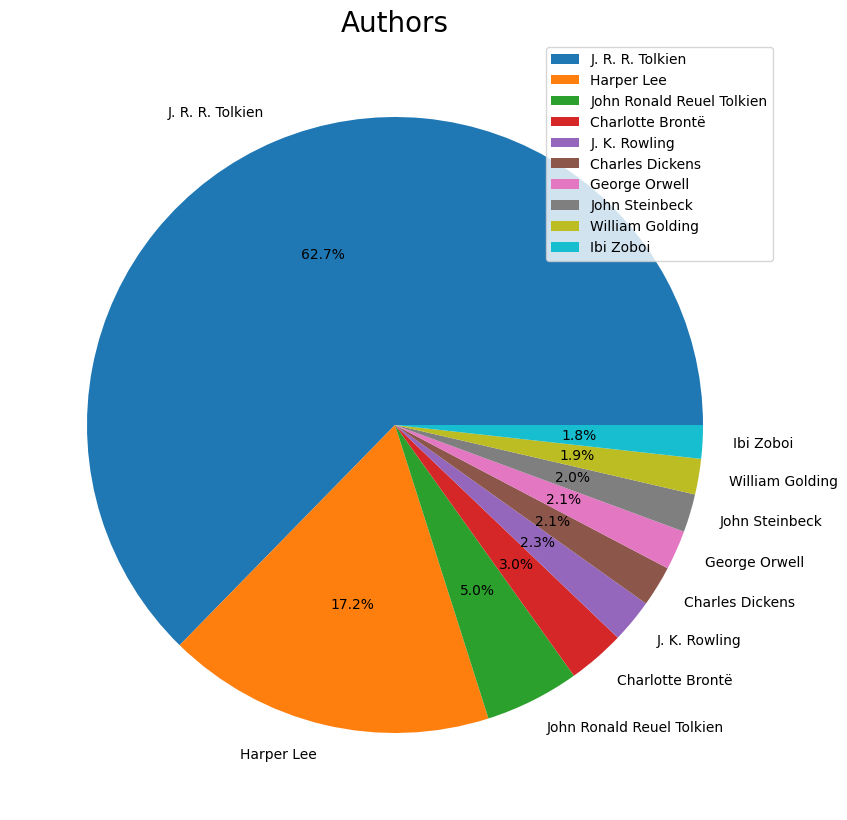

In [102]:
labels=top_10_authors_counts.keys().map(str)

fig = plt.figure(figsize=(10, 10))
plt.pie(top_10_categories_counts, labels=labels,autopct='%1.1f%%')
plt.title('Authors', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

#FIXME Revisar nombres de autores para ver si estan repetidos.

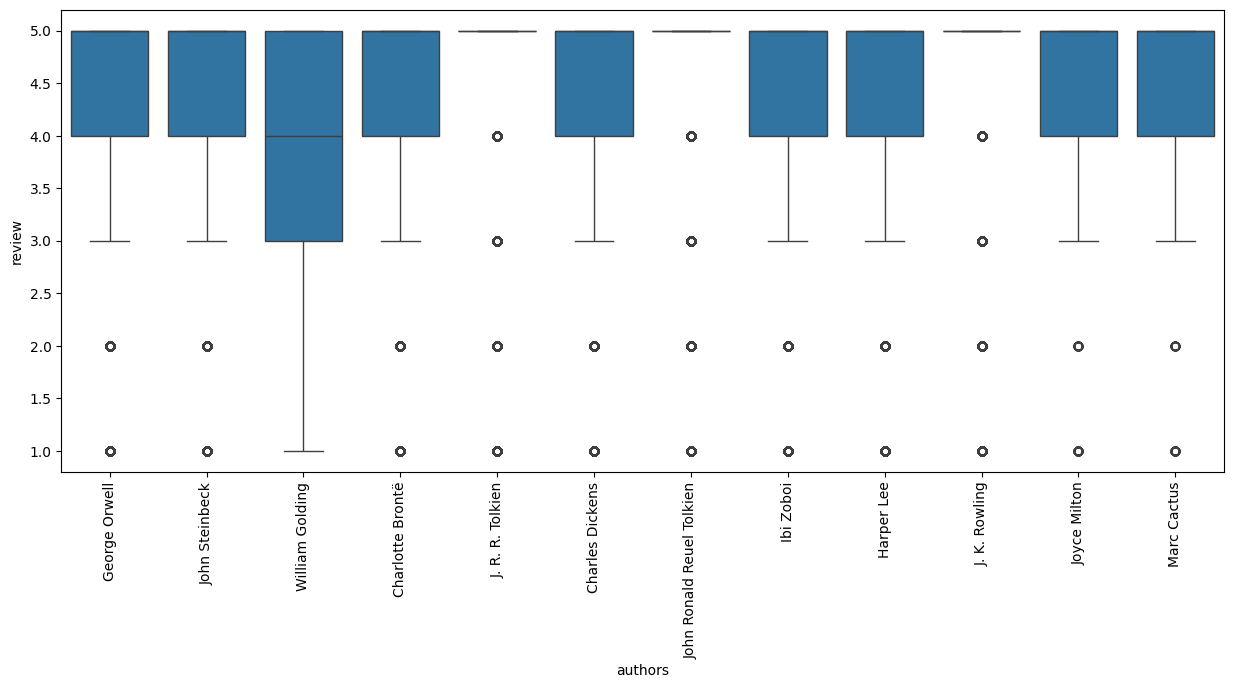

In [103]:
top_authors = top_10_authors_counts.index.to_list()

top_authors_filtered_df = df_all_data[df_all_data['authors'].apply(lambda x: isinstance(x, list) and any(author in x for author in top_authors))]

top_authors_filtered_df = top_authors_filtered_df.explode('authors') 

plt.figure(figsize=(15, 6))  # Set the figure size
sns.boxplot(x='authors', y='review', data=top_authors_filtered_df)
plt.xticks(rotation=90)
plt.show()

#FIXME Las variables title y author son dependientes.

#title, author, etc 

#Definir una regla: Se debe elegir una de las dos. Authors me amplia la cantidad de predicciones que puede generar mi modelo. Title reduce o encajona a ciertos
# libros.

### Key Findings for Authors

- Top 10 most reviewed authors are J. R. R. Tolkien, Harper Lee, John Ronald Reuel Tolkien, Charlotte Brontë, J. K. Rowling, Charles Dickens, George Orwell, John Steinbeck, William Golding and Ibi Zoboi.
- All of the Top 10 most reviewed authors contains reviews values in the 5 review scores [1 ,2 ,3, 4, 5]. All of the Top authors are biased to high review score. Some of them even have the 25%,50% and 75% quartiles of 5 review score (J. R. R. Tolkien, John Ronald Reuel Tolkien, J. K. Rowling).
- J. R. R. Tolkien and John Ronald Reuel Tolkien are the same author. Who is the most rated author. Having 67.7% of the reviews from the top reviewed authors. Reviews for this Tolkien are biased to High review scores, having the 25%, 50% and 75% quartiles on 5. Even so, there are negative reviews for this author.

## Helpfulness

In [104]:
df_all_data.sample(2)

,title,user_id,helpfulness,review,review_year,authors,publisher,categories,published_year,num_reviews,text_clean,sentiment
87035,Outsiders,NaN,0.0,5.0,1999,[S. E. Hinton],Pearson UK,[Bullying],2019,1795,book much could ever imagin everthing happens me eg love life education attitude criticism relate book ratings could higher cos could never sum b...,POS
321600,"Rich Dad, Poor Dad",AUWV5DJRHZ4YU,1.0,4.0,2007,[Sharon L. Lechter],Techpr Incorporated,[Business & Economics],1998,2734,first thing first howto book book mindset frame reference think find book helpful repetitiveness cause one skip ahead believe author subscribing t...,POS


In [105]:
# helpfulness 0/0 = 1 o 0/0 = 0. Revisar ambos
# El 3 es un caso unico aislado (remover), pero si no, analisis.

In [106]:
df_all_data['helpfulness'].describe().T

count    339620.000000
mean          0.358999
std           0.413564
min           0.000000
25%           0.000000
50%           0.000000
75%           0.777778
max           3.000000
Name: helpfulness, dtype: float64

In [149]:
df_all_data[df_all_data['helpfulness'] == 3]['helpfulness'].value_counts()


helpfulness
3.0    1
Name: count, dtype: int64

In [151]:
df_all_data = df_all_data.drop(df_all_data[df_all_data['helpfulness'] == 3].index)
df_all_data[df_all_data['helpfulness'] == 3]['helpfulness'].value_counts()

Series([], Name: count, dtype: int64)

In [153]:
df_all_data['helpfulness'].describe().T

count    339619.000000
mean          0.358991
std           0.413539
min           0.000000
25%           0.000000
50%           0.000000
75%           0.777778
max           1.000000
Name: helpfulness, dtype: float64

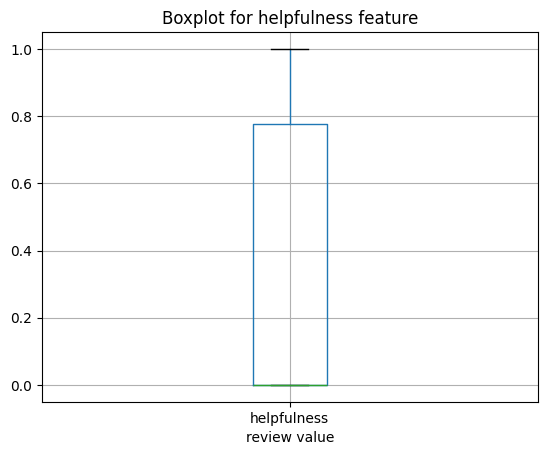

In [152]:
#Create a box plot to check for outliers, median and quartiles 4/6 0/0 1/3 5/5
df_all_data.boxplot(column='helpfulness')
plt.xlabel("review value")
plt.title("Boxplot for helpfulness feature")
plt.show()

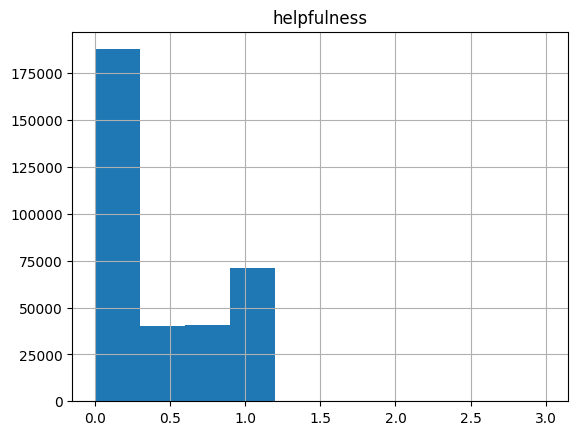

In [108]:
df_all_data.hist(column='helpfulness')
plt.show()

In [109]:
#FIXME revisar analisis de correlacion.

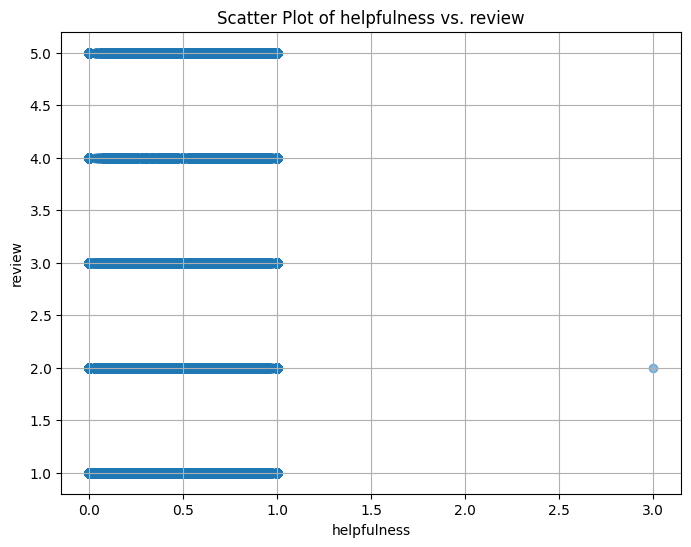

In [110]:
#Check helpfulness agains review 
plt.figure(figsize=(8, 6))
plt.scatter(df_all_data['helpfulness'], df_all_data['review'], alpha=0.5) 

# Set labels and title
plt.xlabel('helpfulness')
plt.ylabel('review')
plt.title('Scatter Plot of helpfulness vs. review')

# Show the plot
plt.grid(True)  # Add grid lines for better visualization
plt.show()

#FIXME Numerica vs Numerica debe ser un scatterplot

/workspaces/final_project_nlp/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)


<Figure size 1000x1000 with 0 Axes>

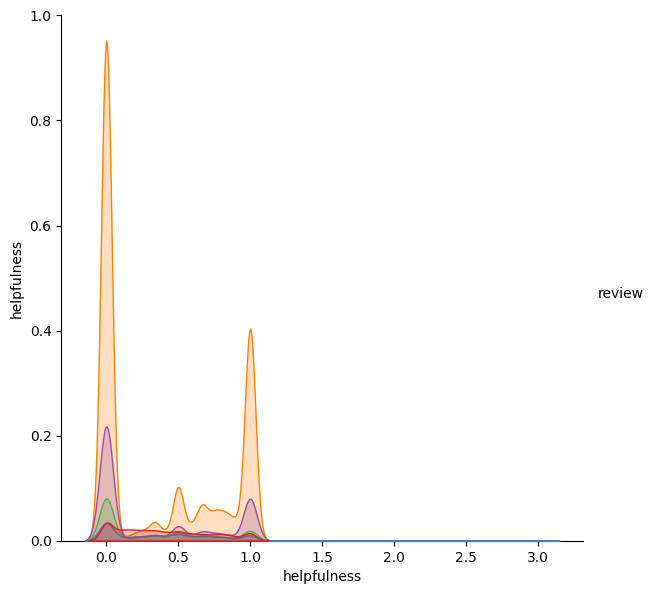

In [111]:
category_palette = sns.color_palette("Set1")
plt.figure(figsize=(10, 10))
sns.pairplot(data=df_all_data[['helpfulness','review']], palette=category_palette,markers=["o", "s", "D"], hue="review", height=6)
plt.show()

## EDA for Review Text Column

In [112]:
pd.set_option('display.max_colwidth', 150)

In [113]:
df_all_data[df_all_data['review']==5]['text_clean'].sample(5, random_state=1299)

75381                                                                                              received book one day book excellent condition  star service
262913                                               book one best books ive read long time assigned book english independent read glad iti sucked start finish
98131                                     paperback th anniversary one volume edition worth price quality better expected happy purchase seller prompt reliable
269626                                                 book long time favorite great info relate others respectfully helps us personally turn respect ourselves
62978     come across book touches soul lingers throughout entire life &quot;little women&quot; timeless classic enjoyed again muchweathered copy true treas...
Name: text_clean, dtype: object

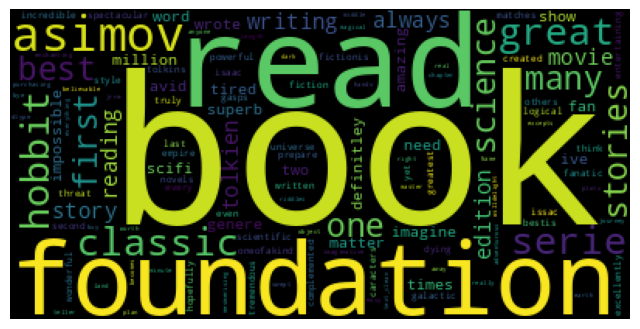

In [114]:
wordcloud5 = WordCloud(max_words=1000).generate(str(df_all_data[df_all_data['review']==5]['text_clean']))

fig = plt.figure(figsize=(8,8))

plt.axis('off')

plt.imshow(wordcloud5)

plt.show()

In [115]:
df_all_data[df_all_data['review']==1]['text_clean'].sample(5, random_state=1299)

87143     book greatest characterssuspense detailthe reasons book things author explians characters feelings physical features suspense narrorator tells emo...
257077    received vintage classics edition jane eyre chosen striking red cover discover  pages missing  nothing frustrating caught wonderful book come scre...
201314    recommend book like read things make sense certainly book point whatsoever fact man would kill supposed friend people absolutely horrible absolute...
234902     skimmed back cover read brief summery figured might pass logical wellwritten book end times surely interesting thought paid counterafter got plan...
61377     agree  star reviews here make fun rewarding reading unlike overhyped waste paper  pages cannot read another word years many people telling read th...
Name: text_clean, dtype: object

In [116]:
df_all_data[df_all_data['review']==3]['text_clean'].sample(5, random_state=1299)

9738      really enjoyed book liked elie weisel descriptive true story holocaust book gave realistic image jews went struggle survival book changed perspect...
51201     enormous amount buzz book author used work vouge pr implies roman clef days far reviews ive seen least two major fashion magazines kind chalked fa...
6161      michael crichton novels heart novel crichtons fascinating scientific speculationin novel implications nanotechnology nanotechnology science manufa...
302545    anyone read series first book current pod appreciate subtlety jordan writes although book filled incredibly exciting events characterized earlier ...
178980    well say first finsihed reading book quite sure thought actually im still sure think story started living expectations lost interest somewhere whi...
Name: text_clean, dtype: object

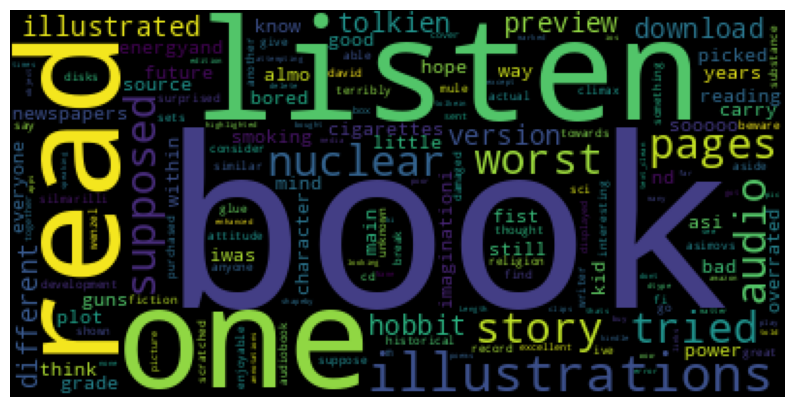

In [117]:
wordcloud1 = WordCloud(max_words=1000).generate(str(df_all_data[df_all_data['review']==1]['text_clean']))

fig = plt.figure(figsize=(10,8))

plt.axis('off')

plt.imshow(wordcloud1)

plt.show()

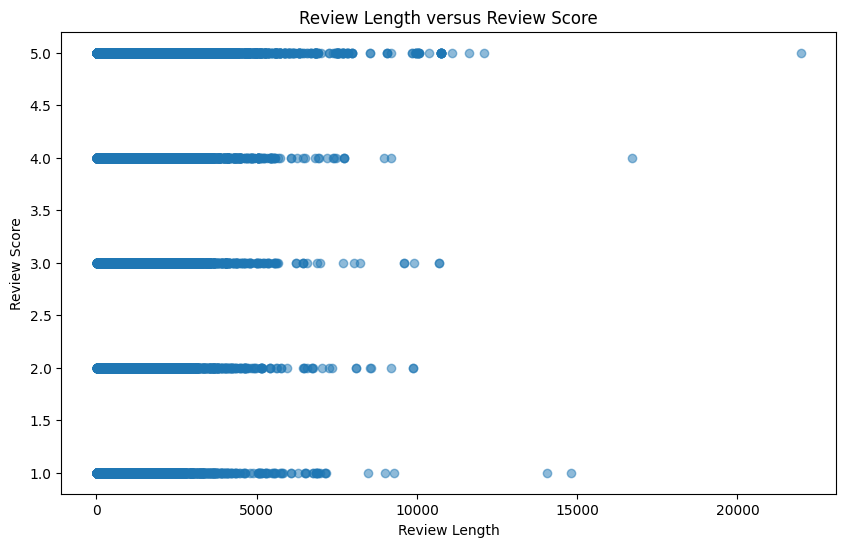

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(df_all_data['text_clean'].str.len(), df_all_data['review'], alpha=0.5)
plt.title('Review Length versus Review Score')
plt.xlabel('Review Length')
plt.ylabel('Review Score')
plt.show()

In [119]:
df_all_data['text_clean'].str.len().mean()

511.7346245918196

In [120]:
df_all_data['text_clean'].str.len().std()

596.0321448071281

In [121]:
long_reviews = df_all_data[df_all_data['text_clean'].str.len() > 2000].copy()

len(long_reviews)

10237

In [122]:
long_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
helpfulness,10237.0,0.619556,0.369648,0.0,0.333333,0.75,1.0,1.0
review,10237.0,4.158249,1.189361,1.0,4.000000,5.00,5.0,5.0
review_year,10237.0,2005.990232,3.844311,1996.0,2003.000000,2006.00,2009.0,2013.0
published_year,10237.0,2000.249487,27.240292,1734.0,1998.000000,2007.00,2014.0,2021.0
num_reviews,10237.0,2222.019049,2437.262286,852.0,1053.000000,1524.00,2470.0,22023.0


In [123]:
long_reviews['text_clean'].str.len().mean()

2869.306144378236

In [124]:
short_reviews = df_all_data[df_all_data['text_clean'].str.len() < 200].copy()

len(short_reviews)

110197

In [125]:
short_reviews['text_clean'].str.len().mean()

117.02919317222792

In [126]:
short_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
helpfulness,110197.0,0.209073,0.358634,0.0,0.0,0.0,0.333333,1.0
review,110197.0,4.388767,1.148869,1.0,4.0,5.0,5.000000,5.0
review_year,110197.0,2006.818008,5.663103,1995.0,2001.0,2009.0,2012.000000,2013.0
published_year,110197.0,1999.468053,30.193101,1734.0,1998.0,2009.0,2014.000000,2021.0
num_reviews,110197.0,2859.631024,3671.197392,852.0,1130.0,1785.0,2975.000000,22023.0


In [127]:
high_reviews = df_all_data[df_all_data['review'] == 5].copy()

high_reviews['text_clean'].str.len().mean()

474.14971193879757

In [128]:
neutral_reviews = df_all_data[df_all_data['review'] == 3].copy() # Neutral ratings tend to be larger in words count

neutral_reviews['text_clean'].str.len().mean()

606.1340832133266

In [129]:
low_reviews = df_all_data[df_all_data['review'] == 1].copy()

low_reviews['text_clean'].str.len().mean()

499.3591848063122

<Figure size 1000x600 with 0 Axes>

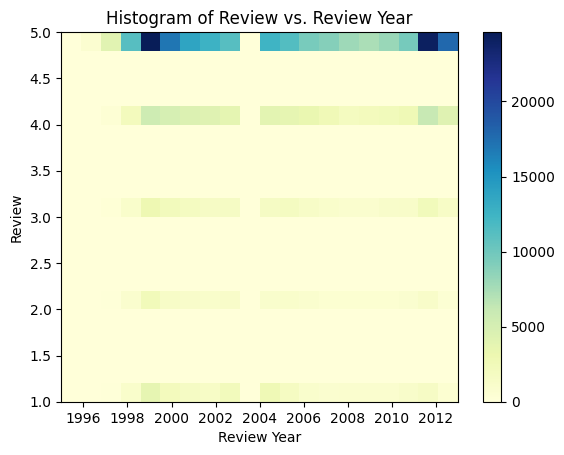

In [130]:
# Create a figure and a set background color
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('white')
plt.figure()
plt.hist2d(df_all_data['review_year'], df_all_data['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

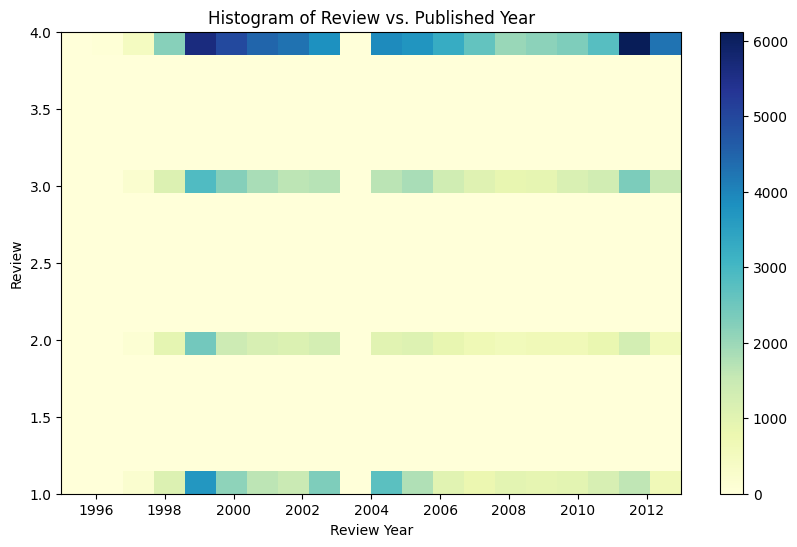

In [131]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data[df_all_data['review'] != 5]['review_year'], df_all_data[df_all_data['review'] != 5]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

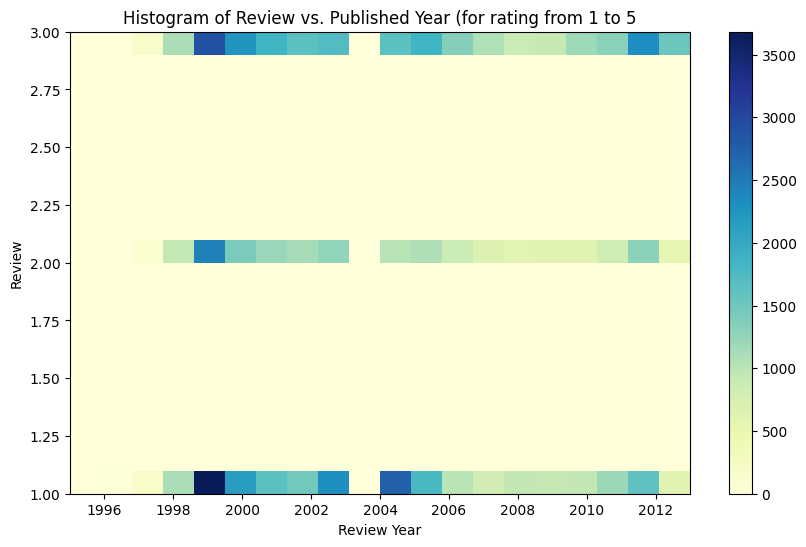

In [132]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data[(df_all_data['review'] != 4) & (df_all_data['review'] != 5)]['review_year'], df_all_data[(df_all_data['review'] != 4) & (df_all_data['review'] != 5)]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year (for rating from 1 to 5')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

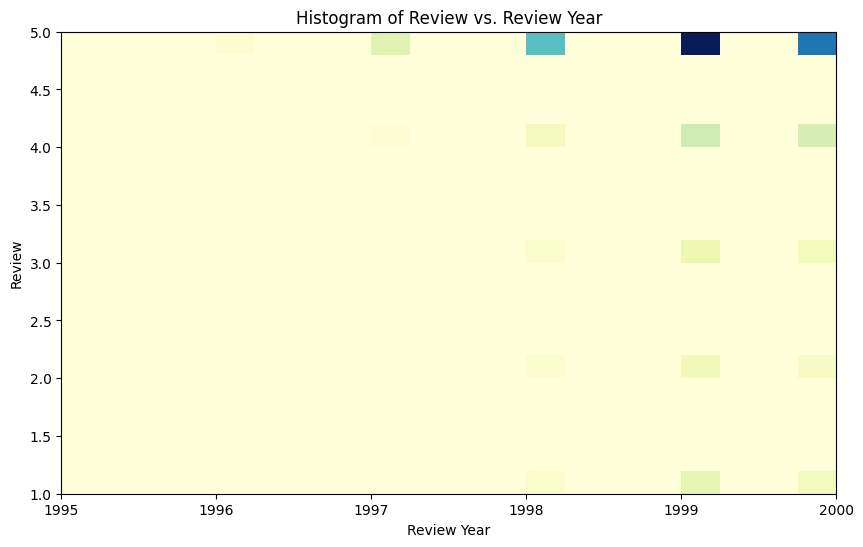

In [133]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data[df_all_data['review_year'] <= 2000]['review_year'], df_all_data[df_all_data['review_year'] <= 2000]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()